In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("noticias_en_classification.csv")

In [3]:
df.head()

,Unnamed: 0,data,titulo,descricao,source,titulo_clean,titulo_en,classification,score,descricao_clean,descricao_en,descricao_classification,descricao_score
0,0,2020-06-30,Ex-ministro da Saúde Correia de Campos alerta ...,"“Preparemo-nos para o que aí vem”, avisou o an...",publico,Ex-ministro da Saúde Correia de Campos alerta ...,Former Health Minister Correia de Campos warns...,NEGATIVE,0.947701,"“ Preparemo-nos para o que aí vem ” , avisou o...","“Let us prepare for what is coming”, warned th...",NEGATIVE,0.937429
1,1,2020-06-30,Estados Unidos compram quase todo o <i>stock</...,A compra das mais de 500 mil doses do medicame...,publico,Estados Unidos compram quase todo o stock de r...,United States buys almost all stock of remdesivir,NEGATIVE,0.852459,A compra das mais de 500 mil doses do medicame...,The purchase of more than 500 thousand doses o...,POSITIVE,0.849041
2,2,2020-06-30,Governo admite quarentena para hotéis com cont...,Hóspedes e funcionários também poderão ficar d...,publico,Governo admite quarentena para hotéis com cont...,Government admits quarantine for hotels with c...,NEGATIVE,0.983680,Hóspedes e funcionários também poderão ficar d...,Guests and staff may also be quarantined in th...,NEGATIVE,0.960382
3,3,2020-06-30,Covid-19: quem quer ajudar os cientistas a seg...,A perda de olfacto é um dos sintomas comuns as...,publico,Covid-19 : quem quer ajudar os cientistas a se...,Covid-19: who wants to help scientists track t...,NEGATIVE,0.998983,A perda de olfacto é um dos sintomas comuns as...,Loss of smell is one of the common symptoms as...,NEGATIVE,0.992243
4,4,2020-06-30,"Profissionais do SNS “não deram o litro, deram...","O documento foi apresentado no Infarmed, em Li...",publico,"Profissionais do SNS “ não deram o litro , der...","SNS professionals “did not give the liter, the...",NEGATIVE,0.962007,"O documento foi apresentado no Infarmed , em L...","The document was presented at Infarmed, in Lis...",NEGATIVE,0.998898


In [4]:
df.shape

(37593, 13)

#### Dealing with null values and "false positives".
For the translation to work, some descriptions had to be replaced by an empty string and these were classified as "positive".

In [5]:
df.isna().sum()

Unnamed: 0                    0
data                          0
titulo                        0
descricao                   352
source                        0
titulo_clean                  1
titulo_en                     1
classification                0
score                         0
descricao_clean             372
descricao_en                372
descricao_classification      0
descricao_score               0
dtype: int64

In [6]:
# keeping Nan Values for now, as they only refer to the description
# some news had a title but not a description

In [7]:
# "há algumas notícias sem descrição que tiveram que levar uma empty string em vez de NaN, para o tradutor e o classificador não darem erro, e foram todos classificados como POSITIVE"
df[df.descricao.isnull()]["descricao_classification"].value_counts()

POSITIVE    352
Name: descricao_classification, dtype: int64

In [8]:
df.dropna(subset=["descricao"],axis=0, how="any", inplace=True)

In [9]:
df.isna().sum()

Unnamed: 0                   0
data                         0
titulo                       0
descricao                    0
source                       0
titulo_clean                 1
titulo_en                    1
classification               0
score                        0
descricao_clean             20
descricao_en                20
descricao_classification     0
descricao_score              0
dtype: int64

In [10]:
# dropping the other rows since % is very low

df.dropna(axis=0, how="any", inplace= True)

In [11]:
df.isna().sum()

Unnamed: 0                  0
data                        0
titulo                      0
descricao                   0
source                      0
titulo_clean                0
titulo_en                   0
classification              0
score                       0
descricao_clean             0
descricao_en                0
descricao_classification    0
descricao_score             0
dtype: int64

#### Dealing with time

In [12]:
df.dtypes

Unnamed: 0                    int64
data                         object
titulo                       object
descricao                    object
source                       object
titulo_clean                 object
titulo_en                    object
classification               object
score                       float64
descricao_clean              object
descricao_en                 object
descricao_classification     object
descricao_score             float64
dtype: object

In [13]:
df["data"] = pd.to_datetime(df["data"], errors = "coerce")

#### Score's Distribution

Text(0.5, 1.0, "title's score distribution")

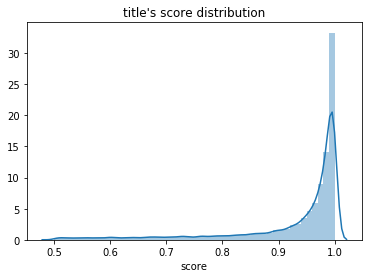

In [14]:
sns.distplot(df["score"]).set_title("title's score distribution")

Text(0.5, 1.0, "description's score distribution")

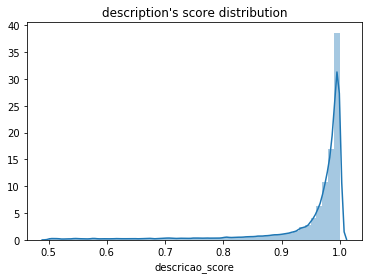

In [15]:
sns.distplot(df["descricao_score"]).set_title("description's score distribution")

### News' frequency

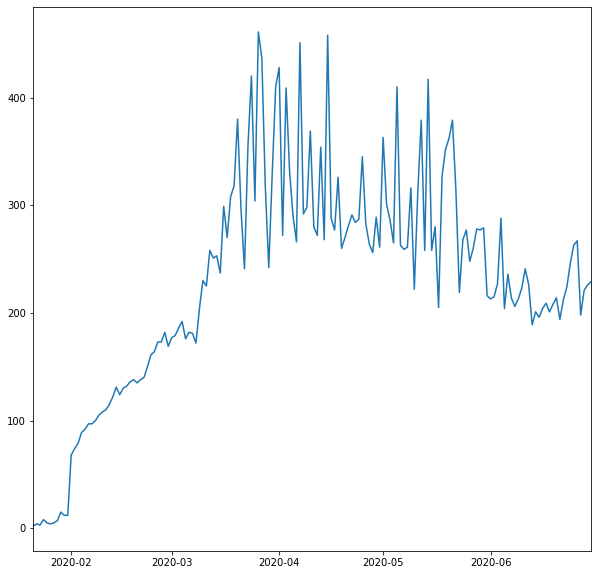

In [16]:
df["data"].dt.date.value_counts().sort_index().plot(kind="line", figsize=(10,10))


plt.show()

### News' sentiment classification

#### Positive vs Negative sentiments on the news (titles)

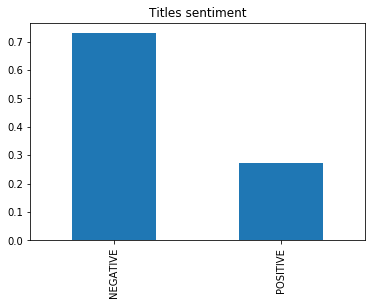

In [17]:


df["classification"].value_counts(normalize=True).plot(kind="bar", 
                                                      title = "Titles sentiment")



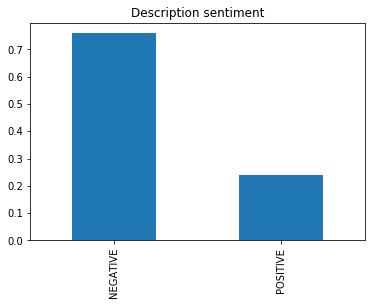

In [18]:

df["descricao_classification"].value_counts(normalize=True).plot(kind="bar", 
                                                      title = "Description sentiment")

In [19]:
df["descricao_classification"].value_counts(normalize=True)

NEGATIVE    0.758678
POSITIVE    0.241322
Name: descricao_classification, dtype: float64

In [20]:
df["classification"].value_counts(normalize=True)

NEGATIVE    0.728882
POSITIVE    0.271118
Name: classification, dtype: float64

Titles seem to be a bit more positive than the the descriptions (maybe given their lenght?, click-bait nature?), but in general, sentiment is mostly negative -- 70% against 30%

#### Titles' sentiment over time

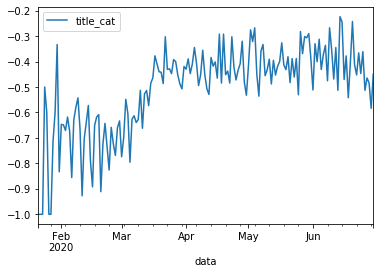

In [23]:
# creating new column. if sentiment is positive +1, if negative -1

df["title_cat"] = np.where(df["classification"]=="POSITIVE",1,-1)

# df that has only relevant values - agg func by default is mean
titles_df = pd.pivot_table(df, values = ["classification","title_cat"], index = ["data"])


titles_df.plot()


In [69]:
# focusing March onwards - more news

titles_df_focus = df[(df.data.dt.month>= 3)]
titles_df_focus.head()

,Unnamed: 0,data,titulo,descricao,source,titulo_clean,titulo_en,classification,score,descricao_clean,descricao_en,descricao_classification,descricao_score,title_cat
0,0,2020-06-30,Ex-ministro da Saúde Correia de Campos alerta ...,"“Preparemo-nos para o que aí vem”, avisou o an...",publico,Ex-ministro da Saúde Correia de Campos alerta ...,Former Health Minister Correia de Campos warns...,NEGATIVE,0.947701,"“ Preparemo-nos para o que aí vem ” , avisou o...","“Let us prepare for what is coming”, warned th...",NEGATIVE,0.937429,-1
1,1,2020-06-30,Estados Unidos compram quase todo o <i>stock</...,A compra das mais de 500 mil doses do medicame...,publico,Estados Unidos compram quase todo o stock de r...,United States buys almost all stock of remdesivir,NEGATIVE,0.852459,A compra das mais de 500 mil doses do medicame...,The purchase of more than 500 thousand doses o...,POSITIVE,0.849041,-1
2,2,2020-06-30,Governo admite quarentena para hotéis com cont...,Hóspedes e funcionários também poderão ficar d...,publico,Governo admite quarentena para hotéis com cont...,Government admits quarantine for hotels with c...,NEGATIVE,0.983680,Hóspedes e funcionários também poderão ficar d...,Guests and staff may also be quarantined in th...,NEGATIVE,0.960382,-1
3,3,2020-06-30,Covid-19: quem quer ajudar os cientistas a seg...,A perda de olfacto é um dos sintomas comuns as...,publico,Covid-19 : quem quer ajudar os cientistas a se...,Covid-19: who wants to help scientists track t...,NEGATIVE,0.998983,A perda de olfacto é um dos sintomas comuns as...,Loss of smell is one of the common symptoms as...,NEGATIVE,0.992243,-1
4,4,2020-06-30,"Profissionais do SNS “não deram o litro, deram...","O documento foi apresentado no Infarmed, em Li...",publico,"Profissionais do SNS “ não deram o litro , der...","SNS professionals “did not give the liter, the...",NEGATIVE,0.962007,"O documento foi apresentado no Infarmed , em L...","The document was presented at Infarmed, in Lis...",NEGATIVE,0.998898,-1


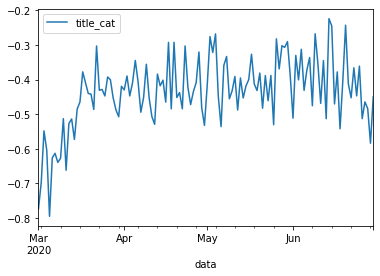

In [60]:
# mean
# pivot table calculates mean by default

x = pd.pivot_table(titles_df_focus, values = ["title_cat"], index = ["data"])

x.plot()

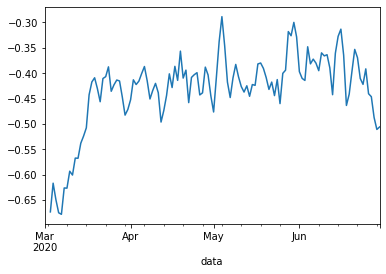

In [65]:
rolling = x["title_cat"].rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.plot()

#### March in detail

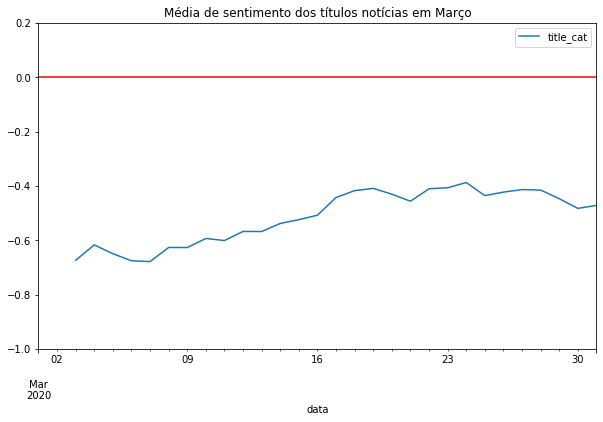

In [81]:
rolling_mean_march =x.loc["2020-02-28":"2020-03-31"].rolling(window=3)
rolling_mean_march = rolling_mean_march.mean()
rolling_mean_march.plot(figsize=(10,6),title="Média de sentimento dos títulos notícias em Março").set_ylim(-1,0.2)

plt.axhline(y=0.0, color='r', linestyle='-')

#### April in detail

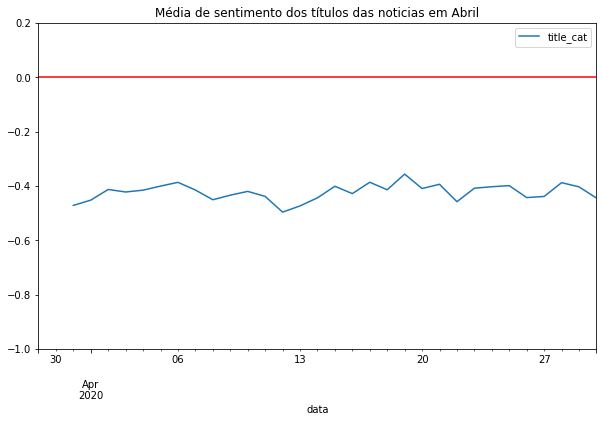

In [82]:
rolling_mean_april =x.loc["2020-03-29":"2020-04-30"].rolling(window=3)
rolling_mean_april = rolling_mean_april.mean()
rolling_mean_april.plot(figsize=(10,6),title="Média de sentimento dos títulos das noticias em Abril").set_ylim(-1,0.2)

plt.axhline(y=0.0, color='r', linestyle='-')

#### May in detail

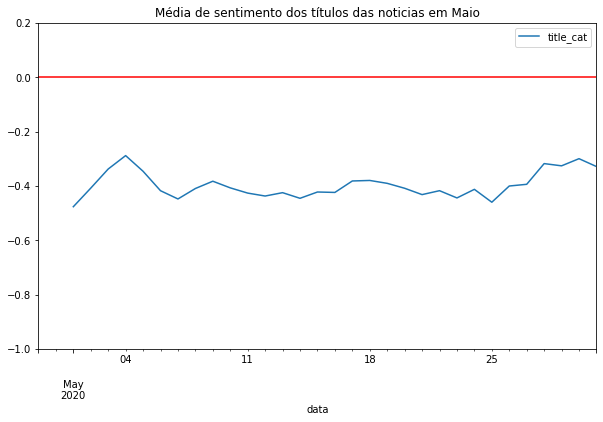

In [84]:
rolling_mean_may =x.loc["2020-04-29":"2020-05-31"].rolling(window=3)
rolling_mean_may = rolling_mean_may.mean()
rolling_mean_may.plot(figsize=(10,6),title="Média de sentimento dos títulos das noticias em Maio").set_ylim(-1,0.2)

plt.axhline(y=0.0, color='r', linestyle='-')